Task 1: Data Cleaning & Preprocessing

 Objective: Learn how to clean and prepare raw data for ML.
 Tools: Python, Pandas, NumPy, Matplotlib/Seaborn
 Hints/Mini Guide:

 1.Import the dataset and explore basic info (nu ls, data types).

 2.Handle missing values using mean/median/imputation.
    
 3.Convert categorical features into numerical using encoding.

 4.Normalize/standardize the numerical features.

 5.Visualize outliers using boxplots and remove them.

In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.shape

(891, 12)

In [36]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [39]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'] = df['Deck'].replace('n', np.nan)  # Fixes 'nan' strings
df['Deck'] = df['Deck'].fillna('U')  # 'U' for Unknown

In [40]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Deck             0
dtype: int64

In [41]:
df['Deck'].value_counts()

Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

 2.Handle missing values using mean/median/imputation.

In [42]:
df= df.dropna(subset=['Embarked'])

In [43]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [44]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
dtype: int64

In [45]:
df.shape

(889, 13)

 3.Convert categorical features into numerical using encoding.

In [46]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Deck'], drop_first=True)

In [48]:
df.shape

(889, 21)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,False,True,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,True,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,True,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,False,True,False,True,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,False,True,False,False,False,False,False,False,False,True


 4.Normalize/standardize the numerical features.

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

5.Visualize outliers using boxplots and remove them.

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


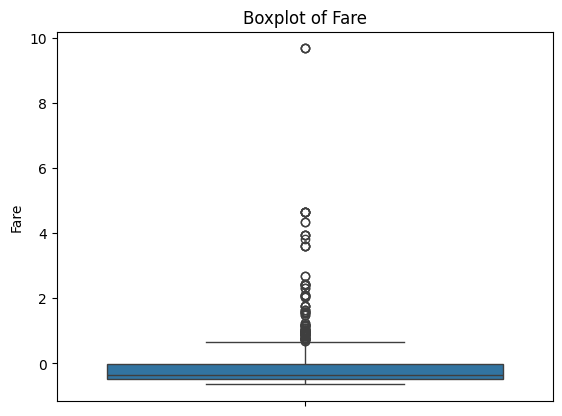

In [52]:
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

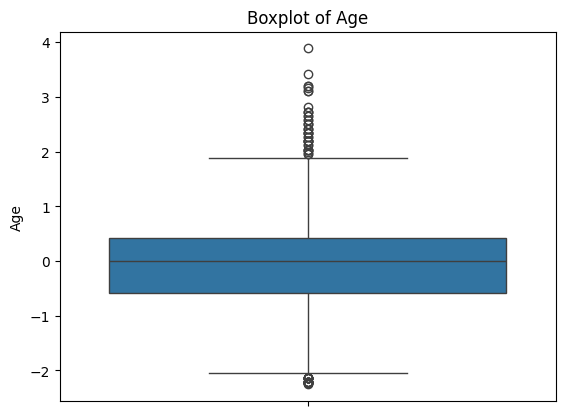

In [53]:
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')
plt.show()

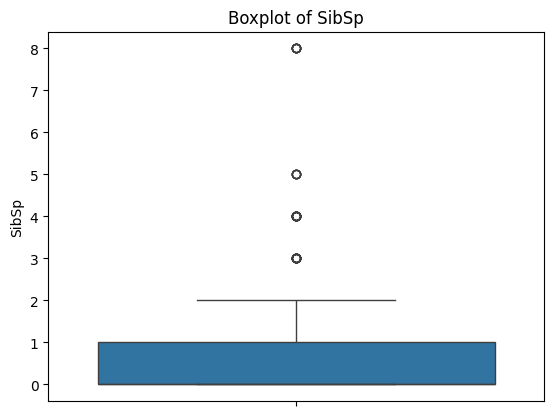

In [54]:
sns.boxplot(y=df['SibSp'])
plt.title('Boxplot of SibSp')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

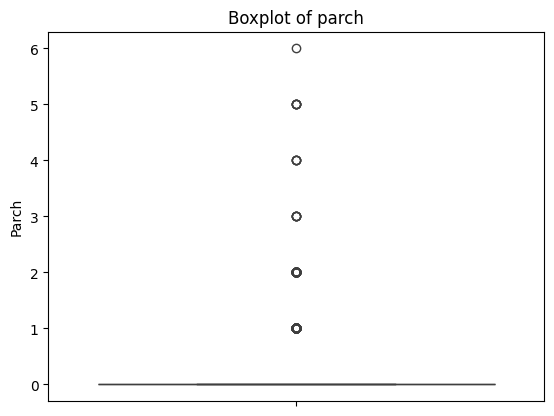

In [58]:
sns.boxplot(y=df['Parch'])
plt.title('Boxplot of parch')
plt.show

In [59]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [60]:
df = remove_outliers_iqr(df, 'Fare')
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'SibSp')
df = remove_outliers_iqr(df, 'Parch')

In [61]:
df.shape

(568, 21)

In [62]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [63]:
df.shape

(568, 17)

Cleaned Data Set

In [64]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,-5.896199e-01,1,0,-0.500240,True,False,True,False,False,False,False,False,False,False,True
2,1,3,-2.810029e-01,0,0,-0.486650,False,False,True,False,False,False,False,False,False,False,True
3,1,1,4.133853e-01,1,0,0.422861,False,False,True,False,True,False,False,False,False,False,False
4,0,3,4.133853e-01,0,0,-0.484133,True,False,True,False,False,False,False,False,False,False,True
5,0,3,-5.482138e-16,0,0,-0.475913,True,True,False,False,False,False,False,False,False,False,True


In [65]:
bool_cols = ['Sex_male',	'Embarked_Q',	'Embarked_S',	'Deck_B',	'Deck_C',	'Deck_D',	'Deck_E',	'Deck_F',	'Deck_G',	'Deck_T',	'Deck_U']
df[bool_cols] = df[bool_cols].astype(int)

In [66]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,-5.896199e-01,1,0,-0.500240,1,0,1,0,0,0,0,0,0,0,1
2,1,3,-2.810029e-01,0,0,-0.486650,0,0,1,0,0,0,0,0,0,0,1
3,1,1,4.133853e-01,1,0,0.422861,0,0,1,0,1,0,0,0,0,0,0
4,0,3,4.133853e-01,0,0,-0.484133,1,0,1,0,0,0,0,0,0,0,1
5,0,3,-5.482138e-16,0,0,-0.475913,1,1,0,0,0,0,0,0,0,0,1
